# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

### 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [19]:
import gensim
# 学習済みモデルを使う場合はKeyedVectors.load_word2vec_format
model = gensim.models.KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300.bin",binary=True)
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

### 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [25]:
import numpy as np
def cos_sim(x,y):
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

United_States = model["United_States"]
US = model["U.S."]

print(cos_sim(United_States,US))
print(model.similarity("United_States","U.S."))

0.7310775
0.73107743


### 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [21]:
print(model.most_similar("United_States"))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400725483894348), ('U.S.', 0.7310774922370911), ('theUnited_States', 0.6404394507408142), ('America', 0.6178409457206726), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019068956375122)]


### 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [22]:
print(model.most_similar(positive=["Spain","Athens"],negative=["Madrid"]))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.5606847405433655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862693786621), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166866183280945), ('Iraklion', 0.5146791338920593)]


### 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [26]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2022-05-06 12:14:05--  http://download.tensorflow.org/data/questions-words.txt
download.tensorflow.org (download.tensorflow.org) をDNSに問いあわせています... 2404:6800:4004:812::2010, 142.250.199.112
download.tensorflow.org (download.tensorflow.org)|2404:6800:4004:812::2010|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 603955 (590K) [text/plain]
`questions-words.txt' に保存中

questions-words.txt 100%[===================>] 589.80K  --.-KB/s 時間 0.1s       

2022-05-06 12:14:05 (4.75 MB/s) - `questions-words.txt' へ保存完了 [603955/603955]



In [64]:
from tqdm import tqdm_notebook as tqdm
f = open("data/questions-words.txt", mode="r")
with open("data/64ans.txt", mode="w") as fout:
    for i in tqdm(f):
        if i[0] == ":":
            fout.write(i)
            continue
        i = i.strip()
        words = i.split()
        similar = model.most_similar(positive=[words[1],words[2]],negative=[words[0]],topn=1)
        fout.write(i+"\t"+similar[0][0]+"\t"+str(similar[0][1])+"\n")

/var/folders/35/vkn6v0f52tb5_2ly8zvwf6y40000gn/T/ipykernel_45743/346629592.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(f):


0it [00:00, ?it/s]

In [66]:
!cat data/64ans.txt | head -n 5

: capital-common-countries
Athens Greece Baghdad Iraq	Iraqi	0.635187029838562
Athens Greece Bangkok Thailand	Thailand	0.7137669920921326
Athens Greece Beijing China	China	0.7235777378082275
Athens Greece Berlin Germany	Germany	0.6734623312950134
cat: stdout: Broken pipe


### 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [78]:
# semantic analogyは「: gram~」じゃないもの syntactic analogyは「: gram~」
with open("data/64ans.txt", mode="r") as fin:
    semantic_correct = 0
    semantic_count= 0
    syntactic_correct = 0
    syntactic_count = 0
    # frag=0はsemantic frag=1はsyntactic
    frag = 0
    for i in tqdm(fin):
        if i[0] == ":":
            if i.startswith(": gram"):
                frag = 1
            else:
                frag = 0
        else:
            i.strip()
            l = i.split()
            if frag == 1:
                if l[3] == l[4]:
                    syntactic_correct += 1
                syntactic_count += 1
            else:
                if l[3] == l[4]:
                    semantic_correct += 1
                semantic_count += 1
    print("意味的アナロジー正解率: {}\n文法的アナロジー正解率: {}".format(semantic_correct/semantic_count, syntactic_correct/syntactic_count))

/var/folders/35/vkn6v0f52tb5_2ly8zvwf6y40000gn/T/ipykernel_45743/1530643618.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(fin):


0it [00:00, ?it/s]

意味的アナロジー正解率: 0.7308602999210734
文法的アナロジー正解率: 0.7400468384074942


### 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [102]:
import numpy as np
from scipy.stats import spearmanr

ans = []
with open("data/wordsim353/combined.csv", "r") as f:
    next(f)
    for i in f:
        i = i.strip()
        l = i.split(",")
        l.append(model.similarity(l[0],l[1]))
        l[2] = float(l[2])
        ans.append(l)

human = np.array(ans).T[2]
wordvec = np.array(ans).T[3]
correlation, p = spearmanr(human, wordvec)
print("スピアマン相関係数: ",correlation)
print("p値: ",p)

スピアマン相関係数:  0.6849564489532377
p値:  3.3287848950139166e-50


### 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [118]:
country = []
f = open("data/questions-words.txt", mode="r")
lines = f.readlines()
frag_country = False
for i in lines:
    if i.startswith(": capital-common-countries") and i[0] == ":":
        frag_country = True
        continue
    elif i.startswith(": capital-world") and i[0] == ":":
        frag_country = True
        continue
    elif i[0] == ":":
        frag_country = False
        continue
    if frag_country:
        l = i.split()
        country.append(l[1])
        country.append(l[3])
print(country[:10])

['Greece', 'Iraq', 'Greece', 'Thailand', 'Greece', 'China', 'Greece', 'Germany', 'Greece', 'Switzerland']


In [148]:
from sklearn.cluster import KMeans
# ベクトル化
countries_vec = np.array([model[c] for c in set(country)])
# n_clustars:クラスタ数
pred = KMeans(n_clusters=5).fit_predict(countries_vec)

In [127]:
country_dict = dict()
for l,i in enumerate(pred):
    if i in country_dict.keys():
        country_dict[i].append(list(set(country))[l])
    else:
        country_dict[i] = [list(set(country))[l]]
for key, value in country_dict.items():
    print("Group:{}\n{}".format(key,value))
from collections import Counter
c = Counter(pred)
print(c)

Group:2
['Ireland', 'Malta', 'Turkey', 'Portugal', 'Croatia', 'Bulgaria', 'Austria', 'Estonia', 'Greenland', 'Georgia', 'Lithuania', 'Slovenia', 'Latvia', 'France', 'Poland', 'Cyprus', 'Liechtenstein', 'Macedonia', 'England', 'Belgium', 'Finland', 'Switzerland', 'Denmark', 'Japan', 'Sweden', 'Italy', 'Norway', 'Hungary', 'Albania', 'Romania', 'Serbia', 'Montenegro', 'Spain', 'Germany', 'Slovakia', 'Greece']
Group:0
['Tajikistan', 'Bhutan', 'Kyrgyzstan', 'Turkmenistan', 'Azerbaijan', 'Bangladesh', 'China', 'Russia', 'Ukraine', 'Uzbekistan', 'Nepal', 'Pakistan', 'Laos', 'Kazakhstan', 'Armenia', 'Belarus', 'Moldova']
Group:1
['Tuvalu', 'Jamaica', 'Uruguay', 'Indonesia', 'Peru', 'Philippines', 'Chile', 'Dominica', 'Taiwan', 'Nicaragua', 'Venezuela', 'Fiji', 'Ecuador', 'Belize', 'Honduras', 'Samoa', 'Thailand', 'Cuba', 'Canada', 'Suriname', 'Guyana', 'Australia', 'Bahamas']
Group:3
['Syria', 'Vietnam', 'Bahrain', 'Jordan', 'Libya', 'Qatar', 'Afghanistan', 'Morocco', 'Oman', 'Egypt', 'Iran',

### 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

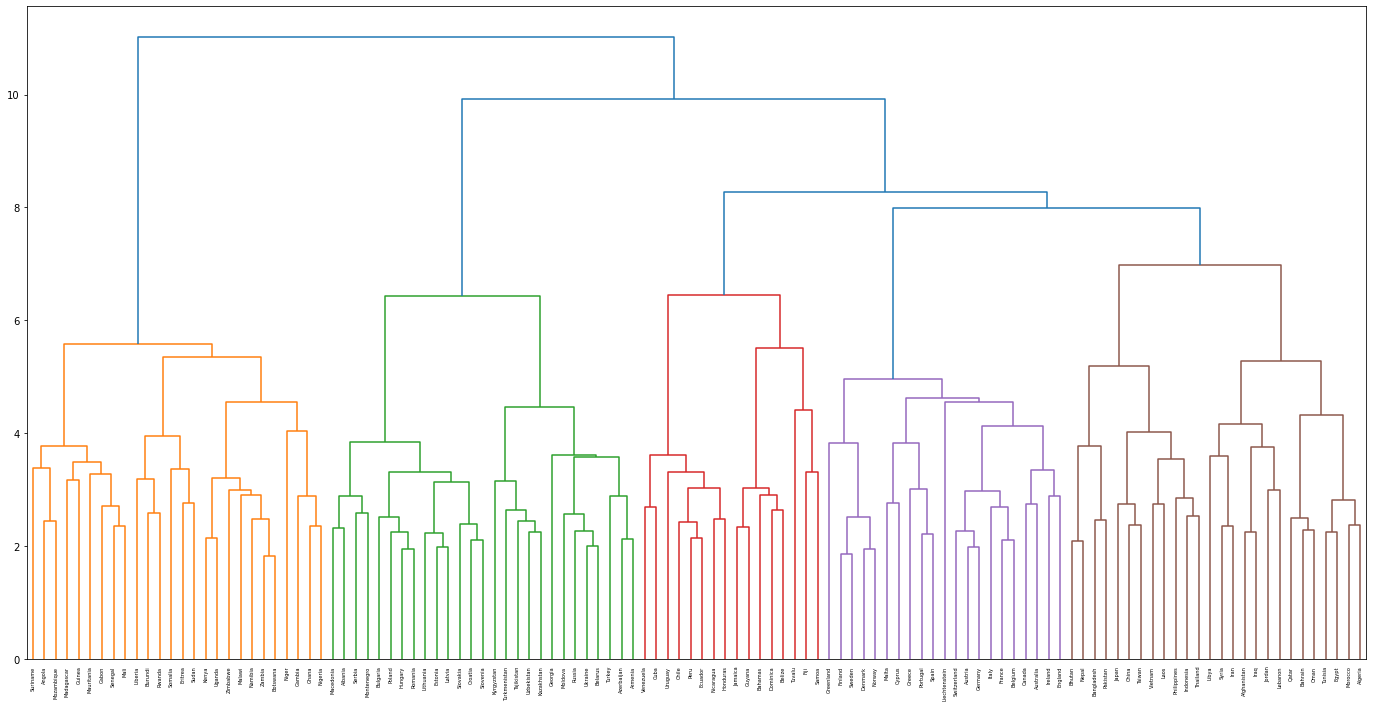

In [133]:
# 参考:https://qiita.com/sho-matsuo/items/cd7f2b66e572bf60048b

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
Z = linkage(countries_vec, 'ward')
dendrogram(Z, labels=list(set(country)))
plt.show()

### 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

(116, 2)


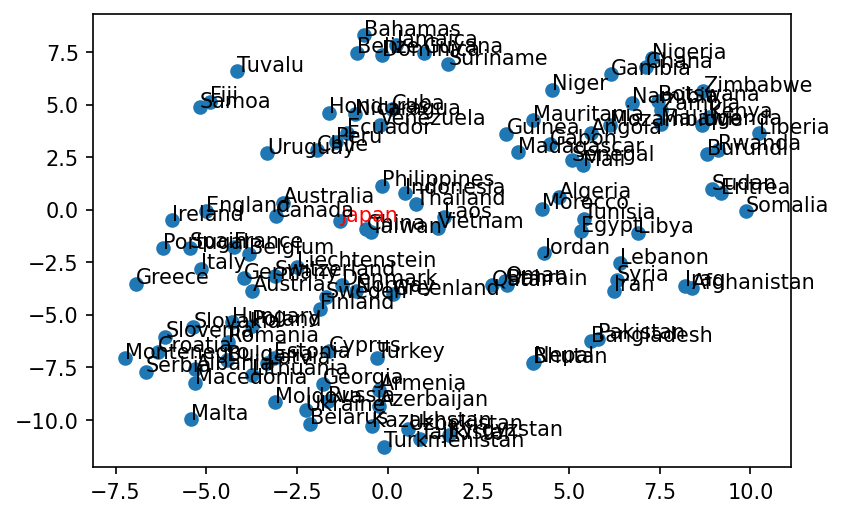

<Figure size 720x720 with 0 Axes>

In [146]:
fig = plt.figure(dpi=150)
from sklearn.manifold import TSNE
# n_components: 埋め込み空間の次元の寸法
embedded = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 1000).fit_transform(countries_vec)

print(embedded.shape)

plt.scatter(embedded[:, 0], embedded[:, 1])
for (x, y), name in zip(embedded, list(set(country))):
    if name == "Japan":
        plt.annotate(name, (x, y), color='r')
    else:
        plt.annotate(name, (x, y))
plt.figure(figsize=(10, 10))
plt.show()